# Comparing GPQ with TR & GLQ

In this notebook we will have an investigation on how well the Gaussian process quadrature using the polynomial basis kernel is performing when compared to classic quadrature rules such as the trapezoidal rule and the Gauss-Legendre rules.

In [1]:
import numpy as np
import scipy as sp
import GPy
import kernels
import functions
from matplotlib import pyplot as plt

## First comparison

First we will compare the rules for a single polynomial (the running example from the bachelorthesis).

In [2]:
rng = np.random.default_rng(420)
length = rng.integers(low=1, high=16, size=1)
coeff = rng.random((length[0],))

def poly(x):
    temp = 0
    for i in range(0, len(coeff)):
        temp = temp + coeff[i] * np.power(x, i)
    return temp

In [3]:
intapprox = np.zeros((3, 6))
abs_err = np.zeros((3, 6))
rel_err = np.zeros((3, 6))
I_poly = sp.integrate.quad(poly, a=-1, b=1, epsabs=1.49e-16)[0]

best_b = np.array([0.99, 0.59, 0.29, 0.44, 0.54, 0.58])
for k in range(2, 8):
    PBK = kernels.PolynomialBasis(input_dim=1, weight=best_b[k-2])
    intapprox[0][k-2] = functions.GPQ(f=poly, kernel=PBK, A=np.array([-1, 1]), NoN=k, return_var=False)
    intapprox[1][k-2] = functions.trapez(f=poly, A=np.array([-1, 1]), NoN=k)
    intapprox[2][k-2] = functions.GLQ(f=poly, A=np.array([-1, 1]), NoN=k)
    abs_err[0][k-2] = np.absolute(intapprox[0][k-2] - I_poly)
    abs_err[1][k-2] = np.absolute(intapprox[1][k-2] - I_poly)
    abs_err[2][k-2] = np.absolute(intapprox[2][k-2] - I_poly)
    rel_err[0][k-2] = abs_err[0][k-2] / np.absolute(I_poly)
    rel_err[1][k-2] = abs_err[1][k-2] / np.absolute(I_poly)
    rel_err[2][k-2] = abs_err[2][k-2] / np.absolute(I_poly)

Now we will plot the results:

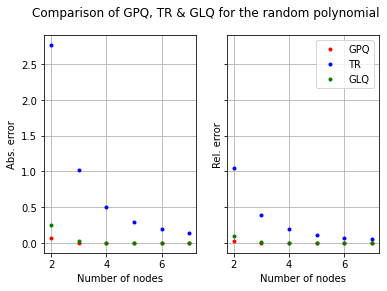

In [4]:
X = np.arange(2, 8, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.suptitle('Comparison of GPQ, TR & GLQ for the random polynomial')
ax1.plot(X, abs_err[0], 'r.', label='GPQ')
ax1.plot(X, abs_err[1], 'b.', label='TR')
ax1.plot(X, abs_err[2], 'g.', label='GLQ')
ax1.set_ylabel('Abs. error')
ax1.set_xlabel('Number of nodes')
ax1.grid()
ax2.plot(X, rel_err[0], 'r.', label='GPQ')
ax2.plot(X, rel_err[1], 'b.', label='TR')
ax2.plot(X, rel_err[2], 'g.', label='GLQ')
ax2.set_ylabel('Rel. error')
ax2.set_xlabel('Number of nodes')
ax2.grid()
ax2.legend()
plt.show()